In [98]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation,LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [99]:
# deal with tickers in S&P 500
sp500 = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS']
sp500_name = ''
for item in sp500:
    sp500_name += item + ' '
sp500_new = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAPL', 'AES', 'AET', 'AFL', 'AMG', 'A', 'GAS', 'APD', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 'BK', 'BAX', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BF-B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBS', 'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ETR', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FLIR', 'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 'GRMN', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HIG', 'HAS', 'HCA', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HST', 'HUM', 'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KR', 'LB', 'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LLY', 'LNC', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MMV', 'MDT', 'MRK', 'MET', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCP', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'REGN', 'RF', 'RSG', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SPG', 'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'SWK', 'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYY', 'TROW', 'TGT', 'TEL', 'TGNA', 'THC', 'TDC', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 'TIF', 'TWX', 'TSCO', 'RIG', 'TRIP', 'FOXA', 'TSN', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 'WMB', 'WEC', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [130]:
# feature creation of moving average
def moving_average(n,df): 
    """
    # Arguments
        n: lag of moving average
        df: dataframe, need to have column named 'Close', need to use date as index
    # Return
        return a series with date as index and close price
    We will use close price to calculate
    """
    start_mean = df['Close'][:n].mean()
    list_mean = [start_mean]
    for i in range(n,len(df.index)):
        start_mean += df['Close'][i]/n -  df['Close'][i-n]/n
        list_mean.append(start_mean)
    return pd.Series(list_mean,index=df.index[n-1:],name='MA_'+str(n))

def feature_create(list_ma,df,pred_len): 
    """
    # Arguments
        list_ma: list of intergers, contains lag of moving average
        df: dataframe, need to have column named 'Close', need to use date as index
    # Return
        return a dataframe, including original data and new moving average columns
        we include return column, this return column is future return from this day!!!
        we will dropna, there will be no NA in dataframe
    """
    new_df = pd.merge(df,moving_average(list_ma[0],df),how='outer',left_index=True,right_index=True)
    for num in list_ma[1:]:
        new_df = pd.merge(new_df,moving_average(num,df),how='outer',left_index=True,right_index=True)
    new_df['return'] = (new_df['Close'].shift(-pred_len) - new_df['Close'])/new_df['Close']
    return new_df.dropna()

# data processing
def df_standarlize(df):
    temp_df = np.array(df)
    s = StandardScaler()
    s.fit(temp_df)
    return pd.DataFrame(s.transform(temp_df),index=df.index,columns=df.columns)

# input creation
def LSTM_input_generator(df,window_len,pred_len,start_date,end_date):
    """
    # Arguments
        df: dataframe, index is time_stamp, columns are different features, no NA allowed
        window_len: how many historical data will feed into model
        pred_len: length for prediction period
        start_date: date that we start gathering features, time stamp
        end_date: date that we stop gathering features, time stamp
    # Return
        x: three dimension array: (sample size, time_step,feature dimension), sample size is determined by date range
        y: value, for example: return, instead of price!!!
    """
    dimension = len(df.columns)-1
    df_select = df[df.index >=start_date]
    df_select = df_select[df_select.index <= end_date]
    sample_size = len(df_select.index) - window_len + 1
    x,y = [],[]
    for i in range(window_len-1,len(df_select.index)):
        x.append(np.array(df_select.iloc[i-window_len+1:i+1,:-1]))
        y.append(df_select['return'][i])
    return np.array(x).reshape(sample_size,window_len,dimension), np.array(y).reshape(sample_size,1)

# train, test split
def split_data(x,y,split_point,stateful=False,batch_size=32):
    """
    # Arguments
        x: three dimension array: (sample size, time_step,feature dimension), sample size is determined by date range
        y: value, for example: close price five days later
        split_pint: a float between 0 and 1, and this percentage of data will be train data
        stateful: True or False
        batch_size: interger,for stateful case, default 32
    # Return
        x_train, x_test, y_train, y_test: shape same as (x,y)
    """
    if not stateful:
        split = int(y.shape[0] * split_point)
        return x[:split], x[split:], y[:split], y[split:]
    if stateful:
        num, residue = y.shape[0]//batch_size, y.shape[0]%batch_size
        split = int(num * split_point)
        return x[residue:residue+split*batch_size], x[residue+split*batch_size:], y[residue:residue+split*batch_size], y[residue+split*batch_size:]

# get data from a company, featurize it,drop ['Dividends','Stock Splits','Volume']
def get_standard_data(ticker,list_ma,pred_len):
    """
    # Arguments
        ticker: company ticker
        list_ma: list of intergers, contains lag of moving average
    # Return
        return a dataframe only with standard features, index is timestamp
        notice: we include volume as one feature under this case
        we standarlized on everything but return
    """
    raw_data = feature_create(list_ma,yf.Ticker(ticker).history(period='max'),pred_len).drop(['Dividends','Stock Splits'],axis=1)
    ret_series = raw_data['return']
    data_standarlized = df_standarlize(raw_data)
    data_standarlized['return'] = ret_series
    return data_standarlized

# model training, stateful
def LSTM_model_stateful(stock_num,window_len,pred_len,epoch_num,split_point,ma_list,batch_size_state=32):
    """
    # Arguments
        all others same as function LSTM_model_stateless
        batch_size_state: stateful case' batch size, will be used in LSTM as well as fit function,default is 32
    # Return
        return prediction graph and training process' detail
        will print out error for test set
        return prediction return
    """
    c = get_standard_data(sp500_new[stock_num],ma_list,pred_len)
    x,y = LSTM_input_generator(c,window_len,pred_len,c.index[0],c.index[-1])
    x_train,x_test,y_train,y_test = split_data(x,y,split_point,True,batch_size_state)
    model = Sequential()
    model.add(LSTM(units=50,return_sequences=False,stateful=True,batch_input_shape=(batch_size_state,window_len, x.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=1,activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=epoch_num,batch_size=batch_size_state,verbose=1,shuffle=False)
#     c_1 = c.iloc[-y_test.shape[0]-y_train.shape[0]:-y_test.shape[0],:]
#     c_1['pred'] = model.predict(x_train)
#     c_1 = c_1.dropna()
#     plt.figure(figsize=(20,10))
#     plt.plot(c_1['return'])
#     plt.plot(c_1['pred'])
#     plt.show()
    c_1 = c.iloc[-y_test.shape[0]:,:]
    c_1['pred'] = model.predict(x_test)
    c_1 = c_1.dropna()
    plt.figure(figsize=(20,10))
    plt.plot(c_1['return'])
    plt.plot(c_1['pred'])
    plt.show()
    print(mean_squared_error(model.predict(x_test),y_test))
    c_1['check'] = c_1['return'] * c_1['pred']
    print((c_1['check']>0).sum()/len(c_1.index))
    return None


# # model training, stateless
# def LSTM_model_stateless(stock_num,window_len,pred_len,epoch_num,split_point,ma_list):
#     """
#     # Arguments
#         stock_num: company ticker number
#         window_len: how many historical data will feed into model
#         pred_len: length for prediction period
#         epoch_num: how many epoch should system go through before stop training
#         split_point: a float between 0 and 1, and this percentage of data will be train data
#         ma_list: list of intergers, contains lag of moving average
#     # Return
#         return prediction graph and training process' detail
#         will print out error for test set
#         return prediction return
#     """
#     c = get_standarize_data(sp500_new[stock_num],ma_list)
#     x,y = LSTM_input_generator(c,window_len,pred_len,c.index[0],c.index[-1])
#     x_train,x_test,y_train,y_test = split_data(x,y,split_point)
#     model = Sequential()
#     model.add(LSTM(units=50,stateful=False,input_shape=(window_len,x.shape[2])))
#     model.add(Dropout(0.2))
#     model.add(Dense(output_dim=1,activation='linear'))
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     model.fit(x_train, y_train, epochs=epoch_num,batch_size=128,verbose=0)
#     c_1 = c.iloc[-y_test.shape[0]:,:]
#     c_1['pred_before'] = model.predict(x_test)
#     c_1['pred'] = c_1['pred_before'].shift(pred_len)
#     c_1 = c_1.dropna()
#     plt.figure(figsize=(20,10))
#     plt.plot(c_1['return'])
#     plt.plot(c_1['pred'])
#     plt.show()
#     print(mean_squared_error(model.predict(x_test),y_test))
#     return (c_1['pred'][-1] - c_1['pred'][-2])/c_1['pred'][-2]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:118: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`


Epoch 1/20
9920/9920 [==============================] - 4s 369us/step - loss: 0.0096
Epoch 2/20
9920/9920 [==============================] - 1s 149us/step - loss: 0.0013
Epoch 3/20
9920/9920 [==============================] - 2s 161us/step - loss: 9.4438e-04
Epoch 4/20
9920/9920 [==============================] - 1s 146us/step - loss: 9.1966e-04
Epoch 5/20
9920/9920 [==============================] - 1s 147us/step - loss: 9.0166e-04
Epoch 6/20
9920/9920 [==============================] - 2s 164us/step - loss: 5.3624e-04
Epoch 7/20
9920/9920 [==============================] - 2s 155us/step - loss: 5.1267e-04
Epoch 8/20
9920/9920 [==============================] - 2s 166us/step - loss: 5.0690e-04
Epoch 9/20
9920/9920 [==============================] - 2s 179us/step - loss: 5.2739e-04
Epoch 10/20
9920/9920 [==============================] - 2s 171us/step - loss: 5.3485e-04
Epoch 11/20
9920/9920 [==============================] - 2s 162us/step - loss: 4.9351e-04
Epoch 12/20
9920/9920 [====

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


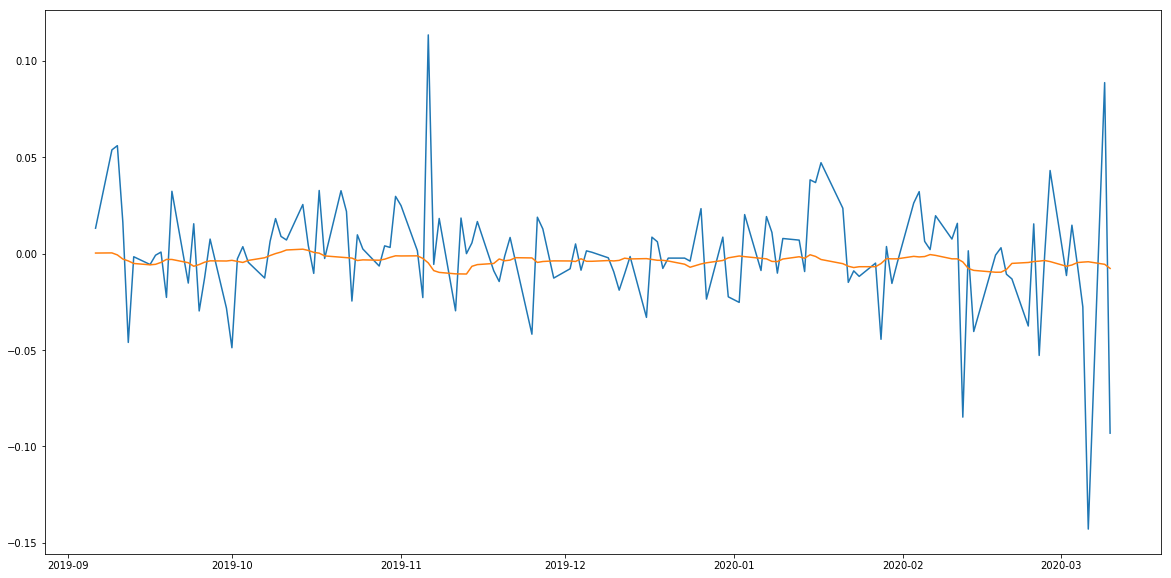

0.0008417123858465329
0.5546875


In [133]:
LSTM_model_stateful(80,5,1,20,0.99,[3,5,10,20],batch_size_state=32)

In [9]:
# trading strategy
def LSTM_rolling_stateful(stock_num,start_train_date_num,last_day_num,window_len,pred_len,epoch_num,ma_list,batch_size_state=32):
    """
    # Arguments
        all others same as function LSTM_model_stateless
        start_train_date_num: the day we start learn our model, should be some big value (integer)
        last_day_num: small value, for example 20, shows our rolling prediction result for 20 nearest days
    # Return
        plot prediction graph
        print accuracy percentage
    """
    c = get_standarize_data(sp500[stock_num],ma_list)
    model = Sequential()
    model.add(LSTM(units=50,stateful=True,batch_input_shape=(batch_size_state,window_len, 4+len(ma_list))))
    model.add(Dropout(0.2))
    model.add(Dense(output_dim=1,activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    ans = []
    for d in range(0,last_day_num):
        x,y = LSTM_input_generator(c,window_len,pred_len,c.index[-start_train_date_num],c.index[-last_day_num+d-pred_len-1])
        x_train,x_test,y_train,y_test = split_data(x,y,1,True,batch_size_state)
        model.fit(x_train, y_train, epochs=epoch_num,batch_size=batch_size_state,verbose=0,shuffle=False)
        cur_x,cur_y = LSTM_input_generator(c,window_len,pred_len,c.index[-last_day_num+d-window_len-pred_len+1-batch_size_state],c.index[-last_day_num+d-pred_len])
        ans.append(model.predict(cur_x)[-1][0])
    temp_df = c.iloc[-last_day_num:,:]
    temp_df['pred'] = np.array(ans).reshape(-1,1)
    temp_df['accuracy'] = (temp_df['pred'].shift(1) - temp_df['pred']) * (temp_df['Close'].shift(1)-temp_df['Close']) > 0
    plt.figure(figsize=(20,10))
    plt.plot(temp_df['Close'])
    plt.plot(temp_df['pred'])
    plt.show()
    print("The accuacy is ", temp_df['accuracy'].sum()/(len(temp_df.index)-1))
    return None

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


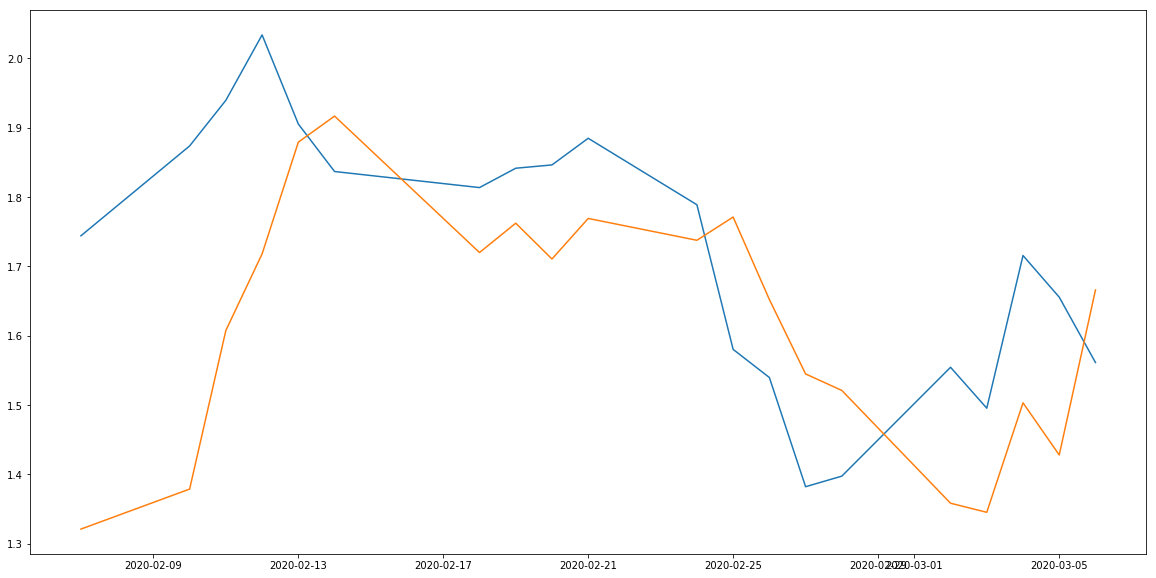

The accuacy is  0.631578947368421


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


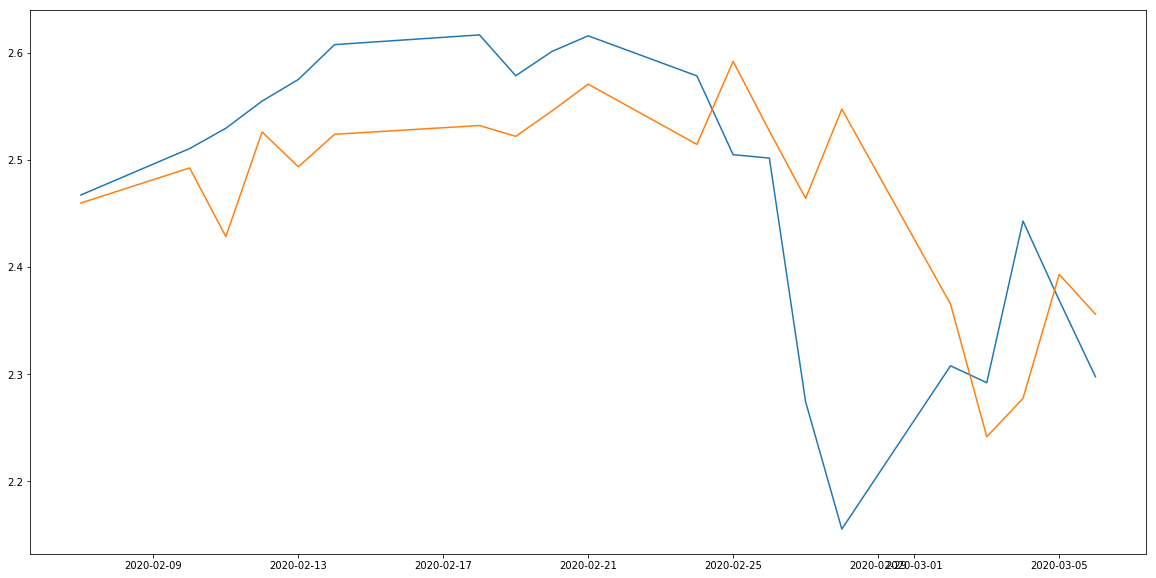

The accuacy is  0.6842105263157895


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


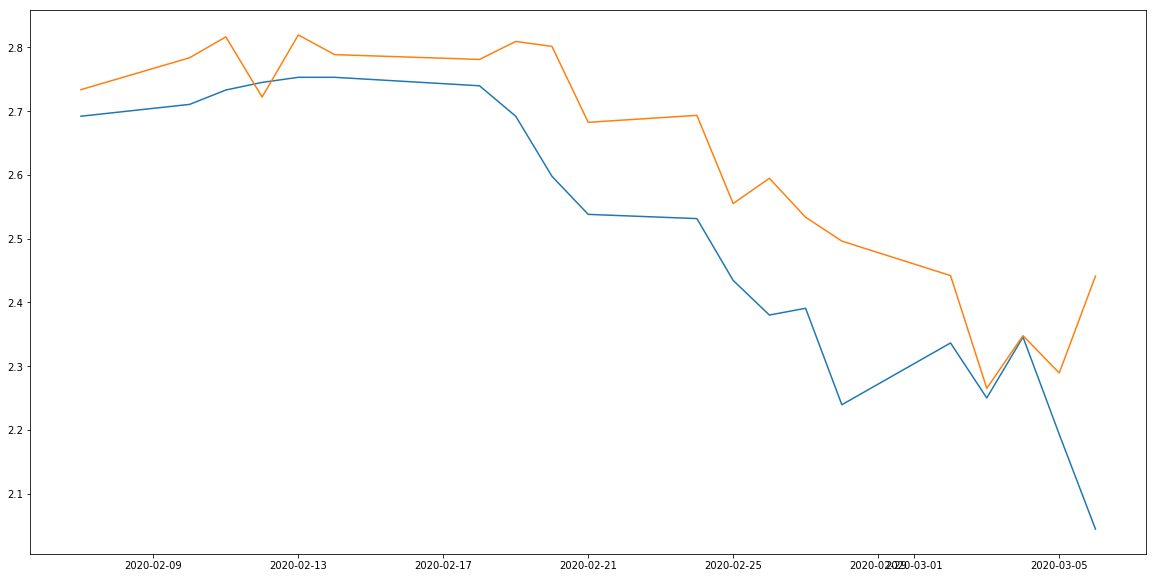

The accuacy is  0.5789473684210527


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


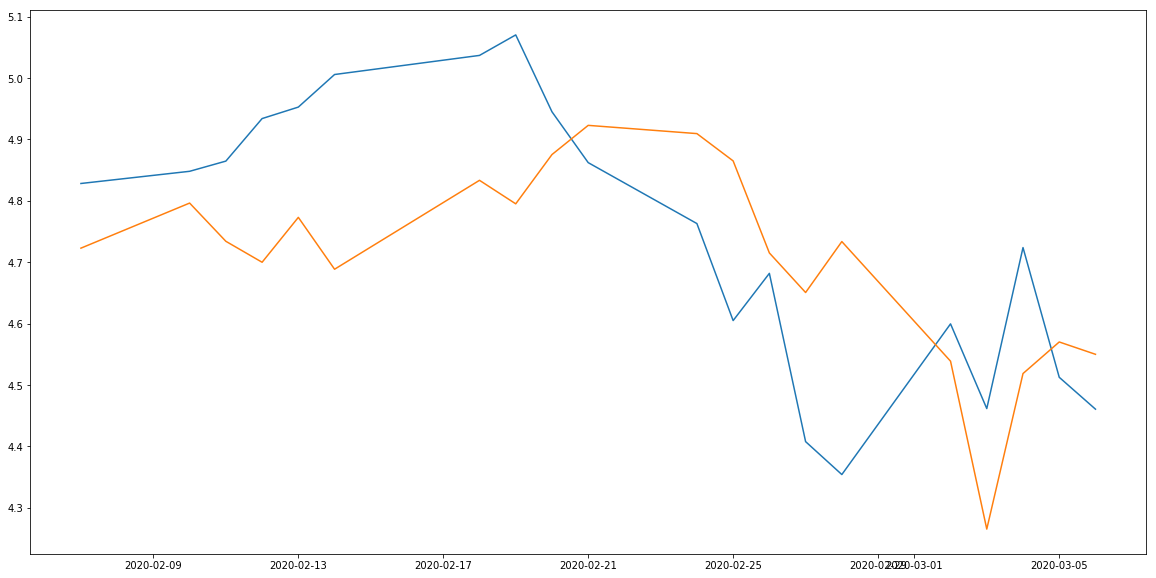

The accuacy is  0.47368421052631576


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


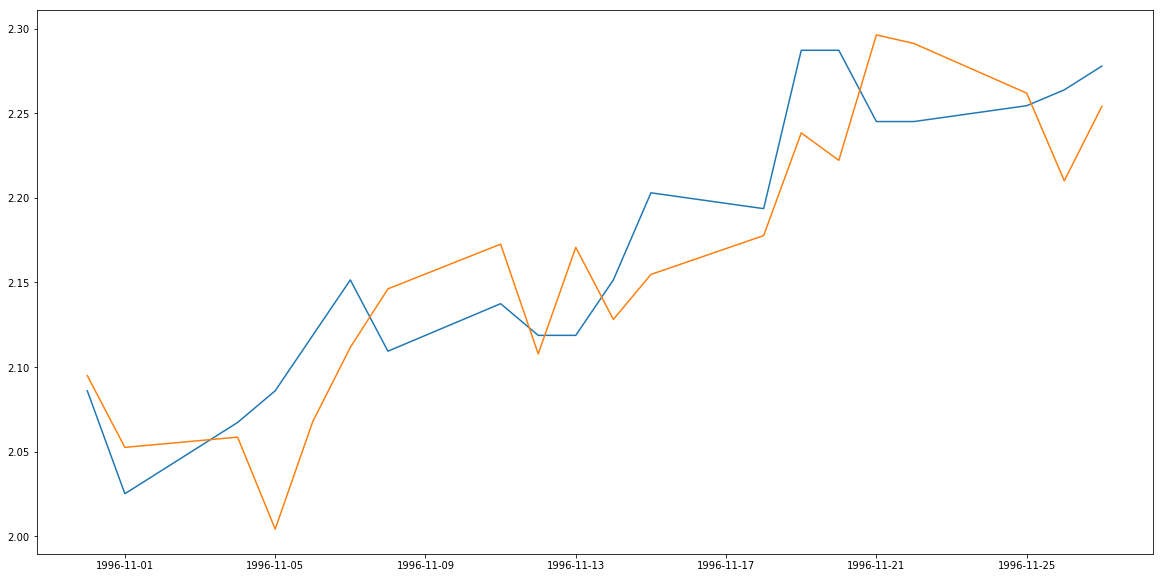

The accuacy is  0.47368421052631576


In [13]:
for i in [1,50,88,100,120]:
    LSTM_rolling_stateful(i,-1000,20,5,1,30,[3,5,10,20],batch_size_state=32)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


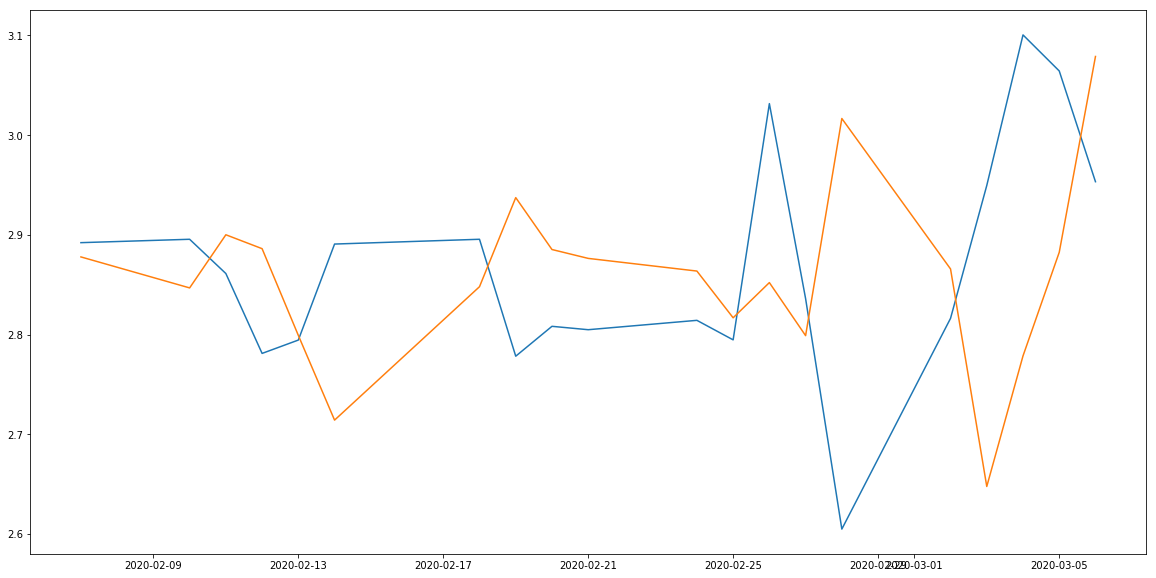

The accuacy is  0.3684210526315789


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


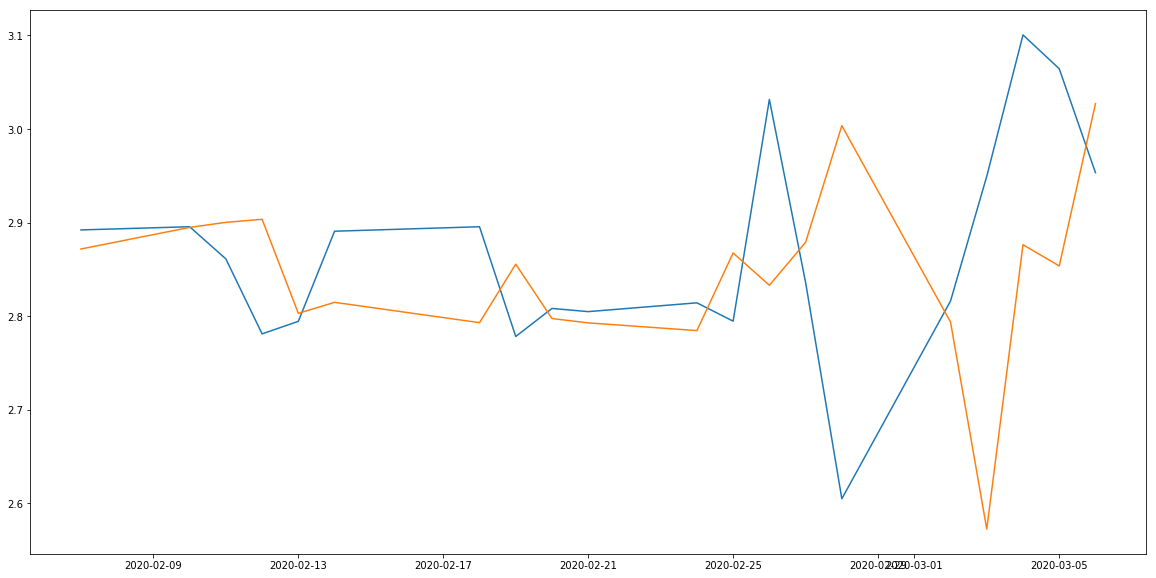

The accuacy is  0.2631578947368421


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


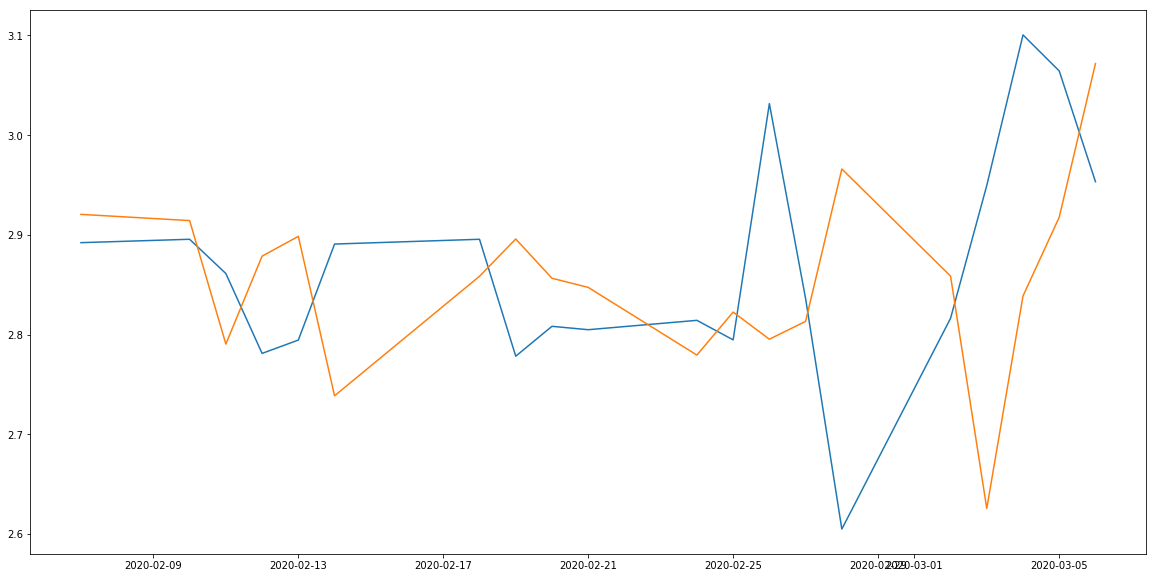

The accuacy is  0.2631578947368421


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


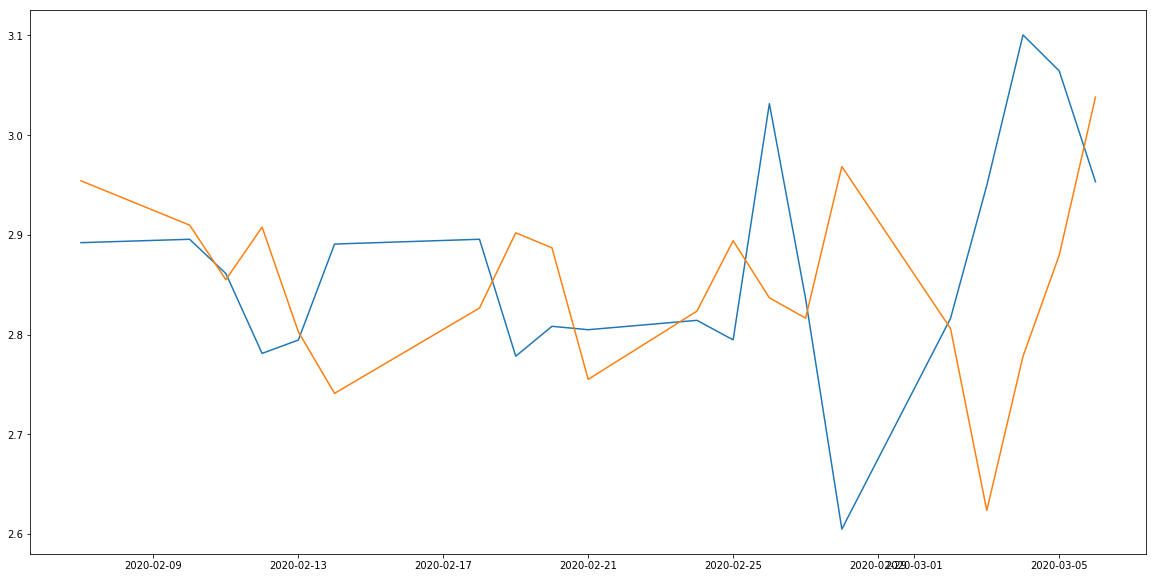

The accuacy is  0.3157894736842105


In [17]:
for item in [4,93,101,144]:
    LSTM_rolling_stateful(i,-1000,20,5,1,30,[3,5,10,20],batch_size_state=32)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


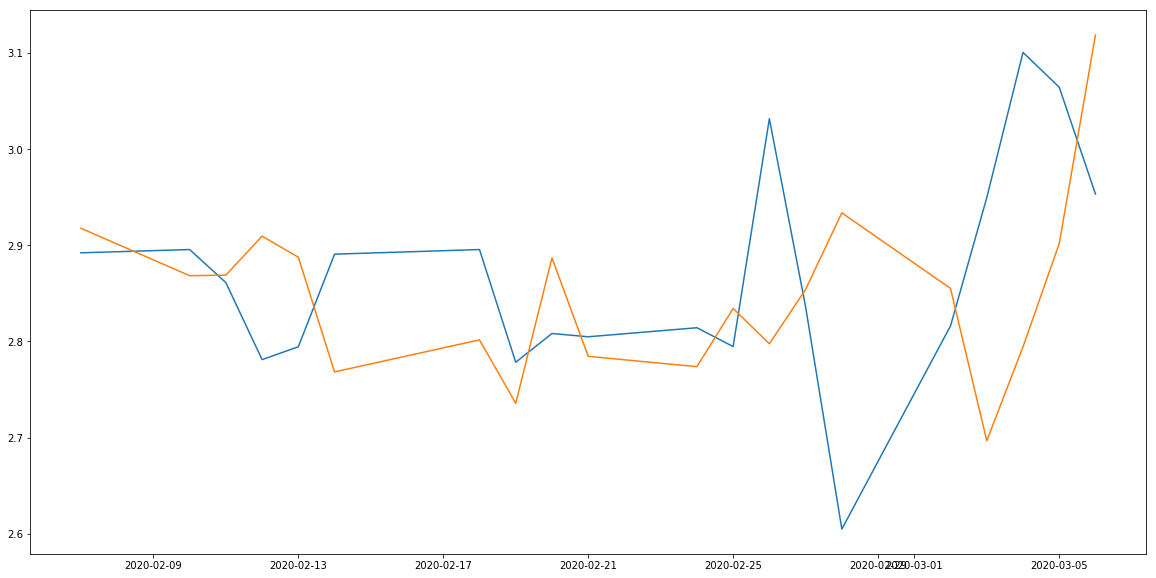

The accuacy is  0.2631578947368421


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


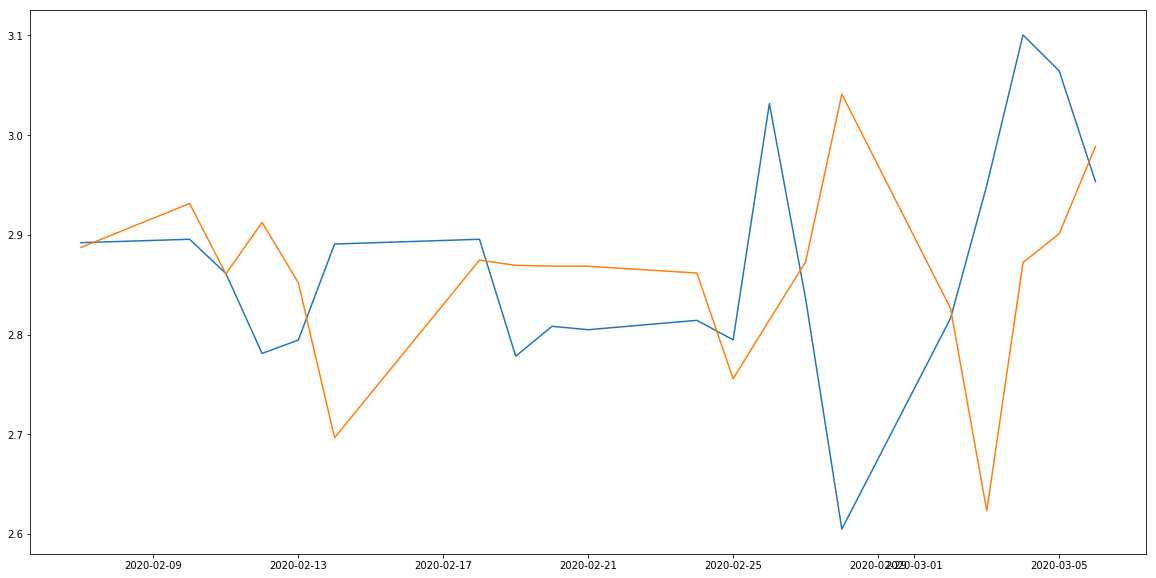

The accuacy is  0.42105263157894735


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


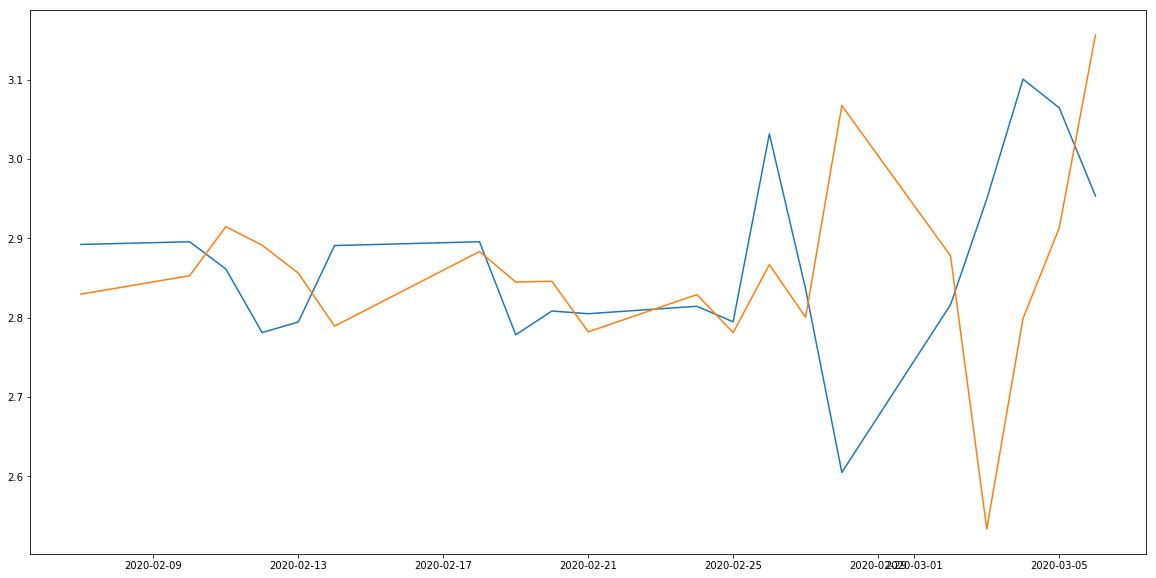

The accuacy is  0.5789473684210527


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  app.launch_new_instance()
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


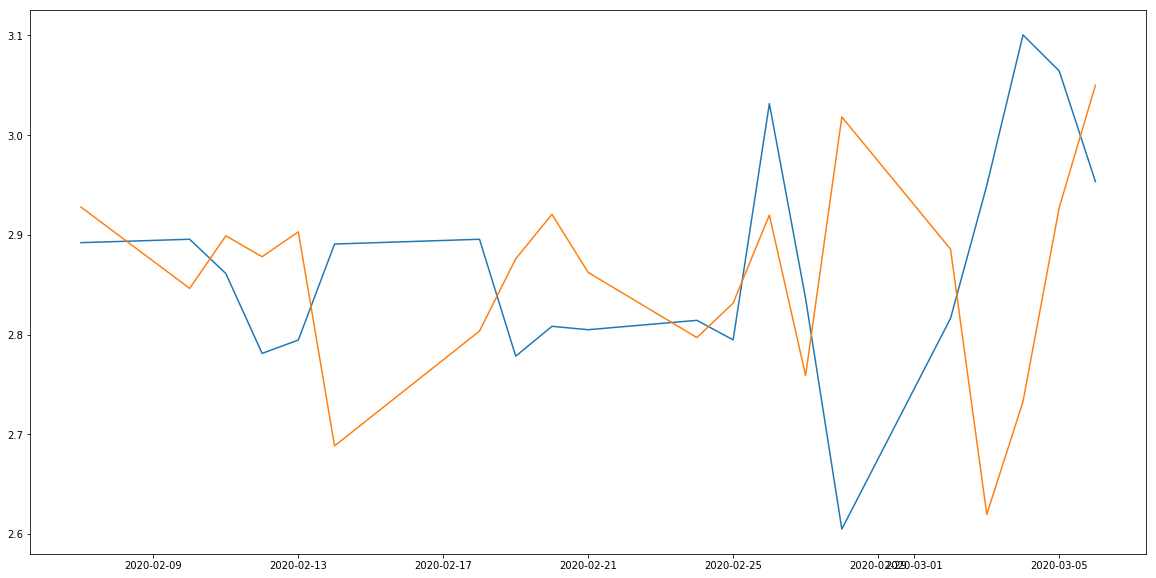

The accuacy is  0.42105263157894735


In [18]:
for item in [5,99,111,122]:
    LSTM_rolling_stateful(i,-1000,20,5,1,30,[3,5,10,20],batch_size_state=32)

加入人工扰动在数据中
加入volume, cap等其他特征
output 成为return,不是价格
grid search, optimizing hyperparameters
include treasury ETF, hedge against months when market is down over all